# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Conclusions:

As predicted, temperature on average increases as latitude draws closer to 0 (the equator), and temperature drops as latitude moves towards the north or south pole.
This is supported through the linear regression model of temperature vs latitude.  The northern and southern hemispheres exhibited r-squared values of 0.82 and 0.4, respectively.
These r-squared values were considerably higher than in any of the linear regression models plotting humidity, cloud coverage, and wind speed vs latitude; regardless of hemisphere, these factors all had r-square values of roughly zero.  The low r-squared value supports that these factors are almost entirely explained by factors other than latitude.
It is noteworthy that the southern hemisphere shows a weaker relationship (lower r-squard value) between temperature and latitude than in the northern hemisphere.  This discrepancy could be partially explained by the geological differences between the northern and southern hemispheres.  The bulk of the earth's land mass is in the northern hemisphere, while the southern hemisphere is proportionately more weighted towards ocean.  Because water has a high specific heat, large bodies of water function as thermal regulators, resulting in fewer temperature extremes. Conversely, areas with very little water (i.e. deserts) have less thermal regulation, allowing temperatures to sway dramatically towards warm or cold weather depending on the time of day.  Because randomly generated coordinates for the southern hemisphere are statistically more likely to fall in oceans or coastal cities than in the norhtern hemisphere, the temperatures within the southern hemisphere data set are more likely to be areas that are more thermally regulated, and less subject to latitude change as the main determinant of temperature.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
starter_lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
starter_lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(starter_lats, starter_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Retrieving data from API call

# Creating empty lists for future information we want from API call

lats = []
lngs = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []


# Creating a city count that starts at 1, but will increase as the following loop iterates through
city_number = 1

cities_to_drop = []

# Constructing the URL in a for-loop
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Sending the API query
    response = requests.get(query_url).json()

    # appending relevant information form each call to its respective list
    try:
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temperature.append((9/5) * (response['main']['temp_max'] - 273) + 32) # Appends and converts from Kelvin to Fahrenheit
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
            
        print(f'City {city_number}: {city}')
        city_number += 1
    except:
        print('City not found')
        cities_to_drop.append(city)
        pass


City 1: rikitea
City 2: sioux lookout
City 3: aklavik
City 4: rafaela
City 5: saint george
City 6: berlevag
City 7: narsaq
City 8: bandrele
City 9: limbang
City 10: touros
City 11: araouane
City 12: mucurici
City 13: bluff
City 14: half moon bay
City 15: mataura
City not found
City 16: qaanaaq
City 17: iqaluit
City 18: new norfolk
City 19: cape town
City 20: ushuaia
City 21: tuatapere
City 22: beringovskiy
City 23: sassandra
City not found
City 24: kazerun
City 25: cherskiy
City 26: castro
City 27: yellowknife
City 28: butaritari
City not found
City 29: punta arenas
City 30: pisco
City 31: novyy urengoy
City not found
City 32: brus laguna
City 33: balikpapan
City 34: puerto ayora
City 35: yola
City not found
City 36: jamestown
City 37: busselton
City 38: omboue
City 39: atuona
City 40: hun
City 41: sinnai
City 42: amapa
City 43: ulaangom
City 44: westport
City 45: jalu
City 46: east london
City 47: abu zabad
City 48: hofn
City 49: yar-sale
City 50: norman wells
City 51: tilichiki
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Printout to confirm the number of values in each list
print("Total Cities: " + str(len(cities)))
print("Cities without information: " + str(len(cities_to_drop)))
print(
    f'Latitude Values: {len(lats)}\n'
    f'Longitude Values: {len(lngs)}\n'
    f'Temperature Values: {len(temperature)}\n'
    f'Humidity Values: {len(humidity)}\n'
    f'Cloudiness Values: {len(cloudiness)}\n'
    f'Wind Speed Values: {len(wind_speed)}\n'
    f'Country Values: {len(country)}\n'
)

# Dropping cities without values from the data set
for city in cities_to_drop:
    cities.remove(city)

print(str(len(cities_to_drop)) + " incomplete cities dropped:")
print(str(len(cities)) + " Cities remaining in data set")

Total Cities: 601
Cities without information: 50
Latitude Values: 551
Longitude Values: 551
Temperature Values: 551
Humidity Values: 551
Cloudiness Values: 551
Wind Speed Values: 551
Country Values: 551

50 incomplete cities dropped:
551 Cities remaining in data set


In [5]:
# Passing lists into a dictionary
weather_dict = {
    "City" : cities,
    "Lat" : lats,
    "Lng" : lngs,
    "Max Temp (f)" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country
}
# Creating a unified data frame
weather_df = pd.DataFrame(weather_dict)

# Exporting weather data frame to .csv file
weather_df.to_csv('../output_data/weather.csv')

weather_df.head()


,City,Lat,Lng,Max Temp (f),Humidity,Cloudiness,Wind Speed,Country
0,rikitea,-23.1203,-134.9692,75.704,81,100,3.81,PF
1,sioux lookout,50.1001,-91.9170,68.270,32,75,3.60,CA
2,aklavik,68.2191,-135.0107,28.670,68,100,2.06,CA
3,rafaela,-31.2503,-61.4867,67.262,54,5,3.26,AR
4,saint george,37.1041,-113.5841,90.266,7,1,10.29,US


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Code to remove any cities if their humidity is over 100% 

weather_df = weather_df.loc[weather_df['Humidity'] <= 100]

# Exporting weather data frame to .csv file
weather_df.to_csv('../output_data/WeatherPy_Output/weather.csv')

weather_df.head()

,City,Lat,Lng,Max Temp (f),Humidity,Cloudiness,Wind Speed,Country
0,rikitea,-23.1203,-134.9692,75.704,81,100,3.81,PF
1,sioux lookout,50.1001,-91.9170,68.270,32,75,3.60,CA
2,aklavik,68.2191,-135.0107,28.670,68,100,2.06,CA
3,rafaela,-31.2503,-61.4867,67.262,54,5,3.26,AR
4,saint george,37.1041,-113.5841,90.266,7,1,10.29,US


## Latitude vs. Temperature Plot

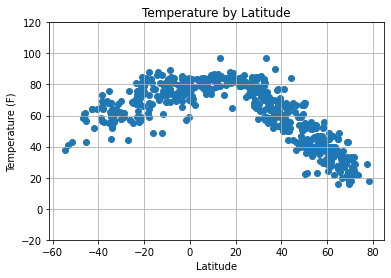

This graph plots the temperature vs latitude for all cities


In [7]:
plt.scatter(lats, temperature)
plt.title('Temperature by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-20, 120)
plt.grid()
plt.show()
print("This graph plots the temperature vs latitude for all cities")

## Latitude vs. Humidity Plot

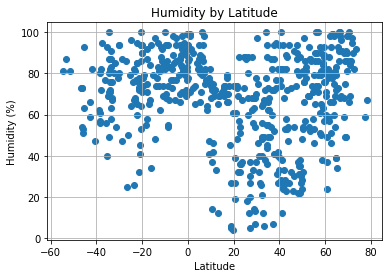

This graph plots the humidity vs latitude for all cities


In [8]:
plt.scatter(lats, humidity)
plt.title('Humidity by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()

plt.show()
print("This graph plots the humidity vs latitude for all cities")

## Latitude vs. Cloudiness Plot

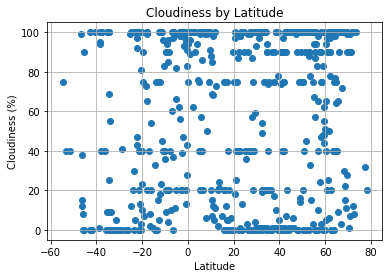

This graph plots the cloudiness vs latitude for all cities


In [9]:
plt.scatter(lats, cloudiness)
plt.title('Cloudiness by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()
plt.show()
print("This graph plots the cloudiness vs latitude for all cities")

## Latitude vs. Wind Speed Plot

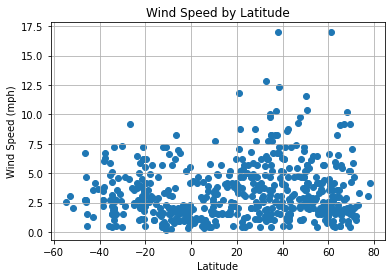

This graph plots the wind speed vs latitude for all cities


In [10]:
plt.scatter(lats, wind_speed)
plt.title('Wind Speed by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()
plt.show()
print("This graph plots the wind speed vs latitude for all cities")

## Linear Regression

In [11]:
# Creating new data frames for northern and southern hemispheres

# North data frame
north_df = weather_df.loc[weather_df['Lat'] > 0]

# Assigning quick variables for later convenience
n_lats = north_df['Lat']
n_temperature = north_df['Max Temp (f)']
n_humidity = north_df['Humidity']
n_cloudiness = north_df['Cloudiness']
n_wind_speed = north_df['Wind Speed']


# South data frame
south_df = weather_df.loc[weather_df['Lat'] < 0]

# Assigning quick variables for later convenience
s_lats = south_df['Lat']
s_temperature = south_df['Max Temp (f)']
s_humidity = south_df['Humidity']
s_cloudiness = south_df['Cloudiness']
s_wind_speed = south_df['Wind Speed']


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

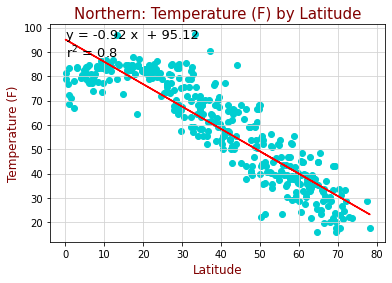

This graph plots the temperature vs latitude for all cities north of the equator


In [12]:
plt.scatter(n_lats, n_temperature, color='darkturquoise')
plt.title('Northern: Temperature (F) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Temperature (F)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_temperature)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_temperature.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Northern_Temp_by_Latitude.png')
plt.show()
plt.show()
print("This graph plots the temperature vs latitude for all cities north of the equator")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

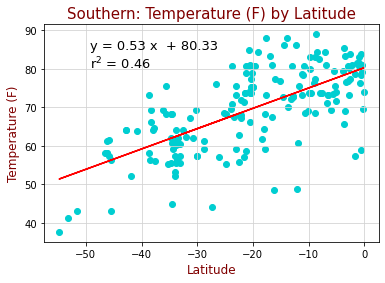

This graph plots the temperature vs latitude for all cities south of the equator


In [13]:
plt.scatter(s_lats, s_temperature, color='darkturquoise')
plt.title('Southern: Temperature (F) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Temperature (F)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_temperature)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (s_lats.min() * 0.9), (s_temperature.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Southern_Temp_by_Latitude.png')
plt.show()
print("This graph plots the temperature vs latitude for all cities south of the equator")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

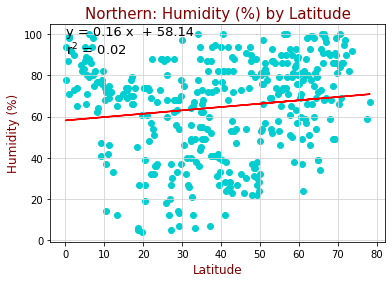

This graph plots the humidity vs latitude for all cities north of the equator


In [14]:
plt.scatter(n_lats, n_humidity, color='darkturquoise')
plt.title('Northern: Humidity (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Humidity (%)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_humidity)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_humidity.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Northern_Hum_by_Latitude.png')
plt.show()
print("This graph plots the humidity vs latitude for all cities north of the equator")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

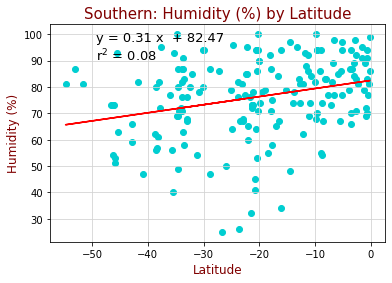

This graph plots the humidity vs latitude for all cities south of the equator


In [15]:
plt.scatter(s_lats, s_humidity, color='darkturquoise')
plt.title('Southern: Humidity (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Humidity (%)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_humidity)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (s_lats.min() * 0.9), (s_humidity.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Southern_Hum_by_Latitude.png')
plt.show()
print("This graph plots the humidity vs latitude for all cities south of the equator")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

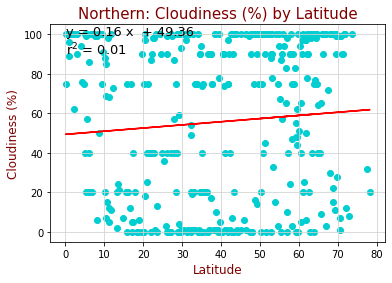

This graph plots the cloudiness vs latitude for all cities north of the equator


In [16]:
plt.scatter(n_lats, n_cloudiness, color='darkturquoise')
plt.title('Northern: Cloudiness (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Cloudiness (%)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_cloudiness)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_cloudiness.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Northern_Cloud_by_Latitude.png')
plt.show()
print("This graph plots the cloudiness vs latitude for all cities north of the equator")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

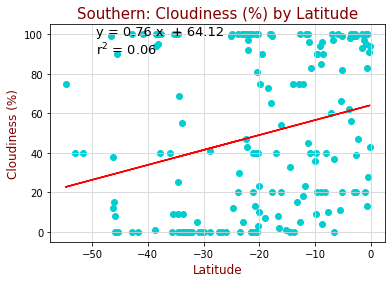

This graph plots the cloudiness vs latitude for all cities south of the equator


In [17]:
plt.scatter(s_lats, s_cloudiness, color='darkturquoise')
plt.title('Southern: Cloudiness (%) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Cloudiness (%)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_cloudiness)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (s_lats.min() * 0.9), (s_cloudiness.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Southern_Cloud_by_Latitude.png')
plt.show()
print("This graph plots the cloudiness vs latitude for all cities south of the equator")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

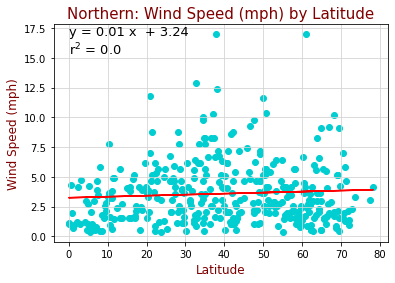

This graph plots the wind speed vs latitude for all cities north of the equator


In [18]:
plt.scatter(n_lats, n_wind_speed, color='darkturquoise')
plt.title('Northern: Wind Speed (mph) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Wind Speed (mph)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_wind_speed)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location
x, y = (n_lats.min() * 1.1), (n_wind_speed.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Northern_Wind_by_Latitude.png')
plt.show()
print("This graph plots the wind speed vs latitude for all cities north of the equator")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

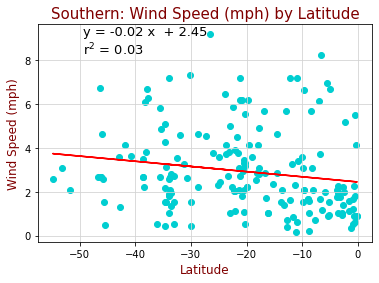

This graph plots the wind speed vs latitude for all cities south of the equator


In [19]:
plt.scatter(s_lats, s_wind_speed, color='darkturquoise')
plt.title('Southern: Wind Speed (mph) by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Wind Speed (mph)', color='maroon', size=12)
plt.grid(color='lightgrey')


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_wind_speed)
regress_model_values = s_lats * slope + intercept
r_squared = rvalue * rvalue

# Auto-generating coordinates for equation and r-squared location

x, y = (s_lats.min() * 0.9), (s_wind_speed.max() * 0.9)

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"

plt.plot(s_lats, regress_model_values, "r-")
plt.annotate(regress_model + '\n' + r_squared_text, (x, y), color='black', size=13)

# Exporting and showing graph
plt.savefig('../output_data/WeatherPy_Output/Northern_Wind_by_Latitude.png')
plt.show()
print("This graph plots the wind speed vs latitude for all cities south of the equator")